<a href="https://colab.research.google.com/github/yyoonyoon/201935291-/blob/main/7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [61]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 2개의 층

In [62]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [63]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [64]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

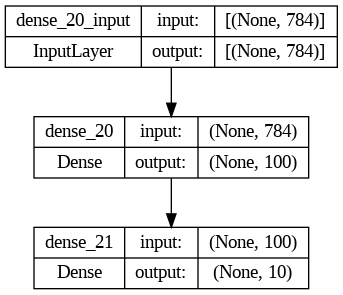

In [65]:
from tensorflow.keras.utils import plot_model

model = keras.Sequential([dense1, dense2])

# 모델을 이미지 파일로 저장
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


## 심층 신경망 만들기

In [66]:
model = keras.Sequential([dense1, dense2])

In [67]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


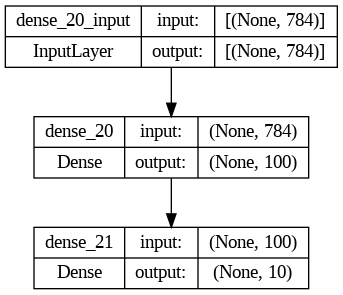

In [68]:
from tensorflow.keras.utils import plot_model

# 모델을 이미지 파일로 저장
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


## 층을 추가하는 다른 방법

In [69]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [70]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3344 - accuracy: 0.8782


Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                             

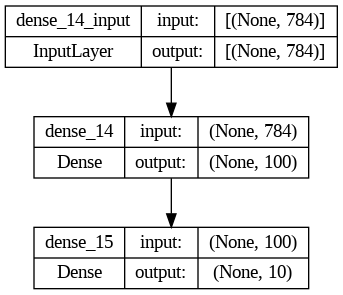

In [45]:
from tensorflow.keras.utils import plot_model
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')
model.summary()
# 모델을 이미지 파일로 저장
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)



from tensorflow.keras.utils import plot_model
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
# 모델을 이미지 파일로 저장
plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)

## 렐루 활성화 함수

In [46]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [49]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5298 - accuracy: 0.8116
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3915 - accuracy: 0.8575
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3528 - accuracy: 0.8723
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3296 - accuracy: 0.8815
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3138 - accuracy: 0.8861


In [50]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8738


[0.3611322343349457, 0.8738333582878113]

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.8910 - val_loss: 0.3963 - val_accuracy: 0.8647
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2936 - accuracy: 0.8950 - val_loss: 0.4074 - val_accuracy: 0.8652
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2856 - accuracy: 0.8996 - val_loss: 0.4000 - val_accuracy: 0.8752
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2776 - accuracy: 0.9022 - val_loss: 0.3729 - val_accuracy: 0.8783
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2703 - accuracy: 0.9046 - val_loss: 0.3699 - val_accuracy: 0.8817


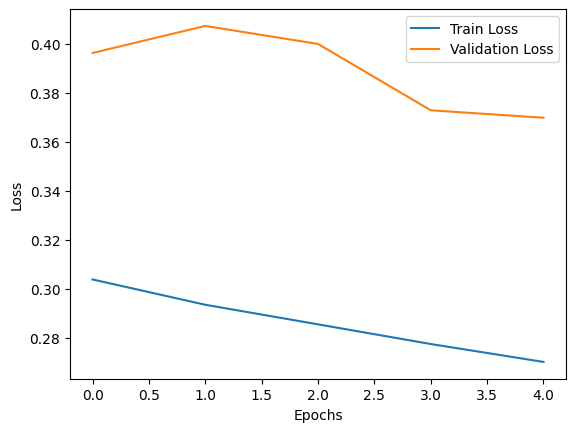

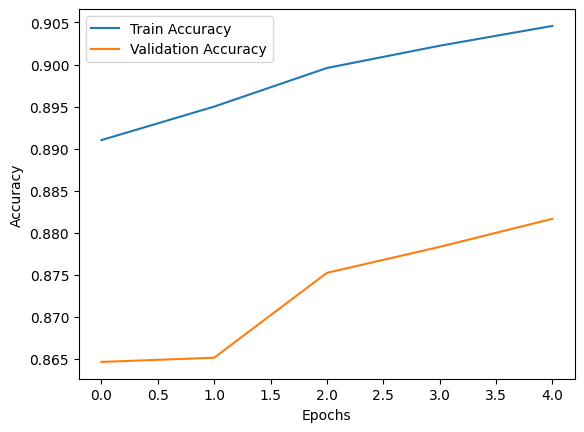

In [51]:
import matplotlib.pyplot as plt

history = model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))

# 손실 곡선 그래프
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 곡선 그래프
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


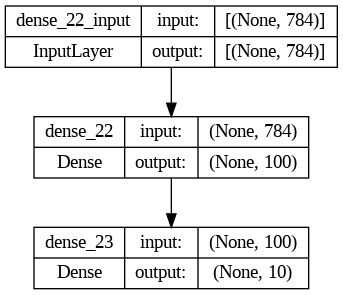

In [74]:
from tensorflow.keras.utils import plot_model

# 모델을 이미지 파일로 저장
plot_model(model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)


375/375 [==============================] - 1s 2ms/step


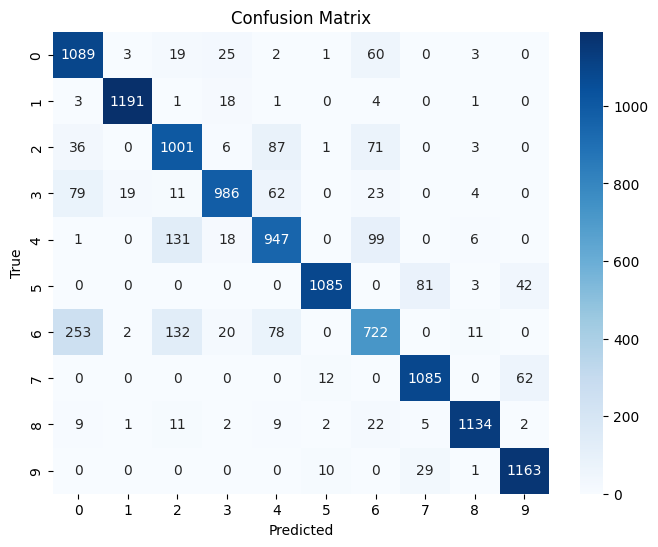

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

val_predictions = model.predict(val_scaled)
val_predictions_classes = np.argmax(val_predictions, axis=-1)
cm = confusion_matrix(val_target, val_predictions_classes)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 옵티마이저

In [52]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [53]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [54]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [55]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [56]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [57]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [58]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5208 - accuracy: 0.8178
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3895 - accuracy: 0.8596
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3509 - accuracy: 0.8722
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3271 - accuracy: 0.8818
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3059 - accuracy: 0.8880


In [60]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8749


[0.3501945734024048, 0.874916672706604]

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3217 - accuracy: 0.8821 - val_loss: 0.3473 - val_accuracy: 0.8752
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3093 - accuracy: 0.8871 - val_loss: 0.3570 - val_accuracy: 0.8690
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2992 - accuracy: 0.8915 - val_loss: 0.3296 - val_accuracy: 0.8808
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2894 - accuracy: 0.8948 - val_loss: 0.3317 - val_accuracy: 0.8797
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8971 - val_loss: 0.3382 - val_accuracy: 0.8784


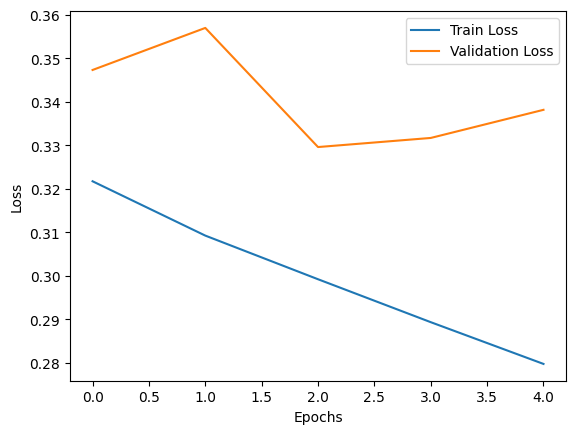

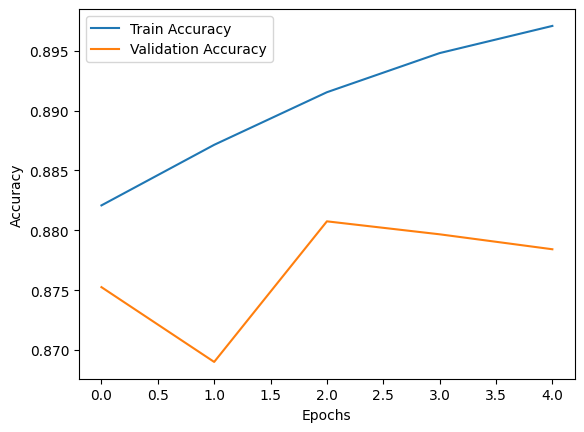

In [77]:
import matplotlib.pyplot as plt

history = model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))

# 손실 곡선 그래프
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 곡선 그래프
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


375/375 [==============================] - 1s 2ms/step


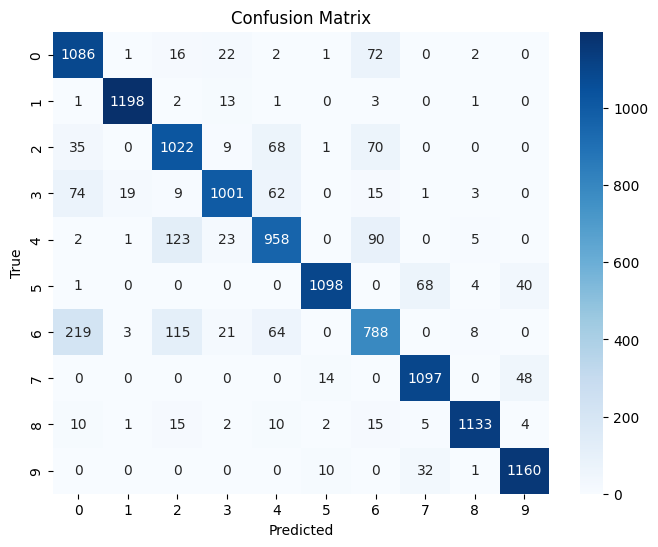

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_predictions = model.predict(val_scaled)
val_predictions_classes = np.argmax(val_predictions, axis=-1)
cm = confusion_matrix(val_target, val_predictions_classes)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


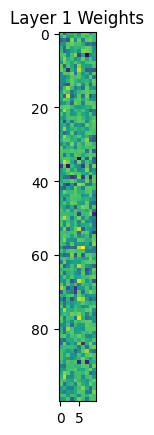

In [79]:
weights, biases = model.layers[1].get_weights()
plt.imshow(weights, cmap='viridis')
plt.title('Layer 1 Weights')
plt.show()
